# Dependencies and data viz settings

In [11]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

import os, sys
import warnings
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = (15, 8)
warnings.filterwarnings('ignore')

# Fix values

In [34]:
p0 = 300000
T = 90
d_pt = 0.015
s0 = 14000000
d_st = 600000
thm = 0.03
h_max_t = 120

print("Current desired price/sqm: %s HUF" %p0)
print("Desired apartment size: %s sqm" %T)
print("Monthly predicted change in price: %s percent" %(d_pt * 100))
print("Current sum of savings: %s HUF" %s0)
print("Monthly increase in savings: %s HUF" %d_st)
print("THM: %s percent" %(thm * 100))
print("Loan runtime: %s months" %h_max_t)

Current desired price/sqm: 300000 HUF
Desired apartment size: 90 sqm
Monthly predicted change in price: 1.5 percent
Current sum of savings: 14000000 HUF
Monthly increase in savings: 600000 HUF
THM: 3.0 percent
Loan runtime: 120 months


# Equations

In [35]:
# Function to obtain total price per sqm
def pt(t):
    return (1 + d_pt)**t * p0 * T

# Function to calculate savings "t" months from now
def st(t):
    return d_st * t + s0

# Function to loan amount to pay back "t" months from now
def ht(t):
    return (pt(t) - st(t)) * (1 + thm)**(h_max_t / 12.0)

# Optimize

In [39]:
from scipy import optimize

result = optimize.minimize_scalar(ht, bounds=[0,100], method="Bounded")
result

     fun: 13653598.61859918
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 26.899494064969286

# Visualize

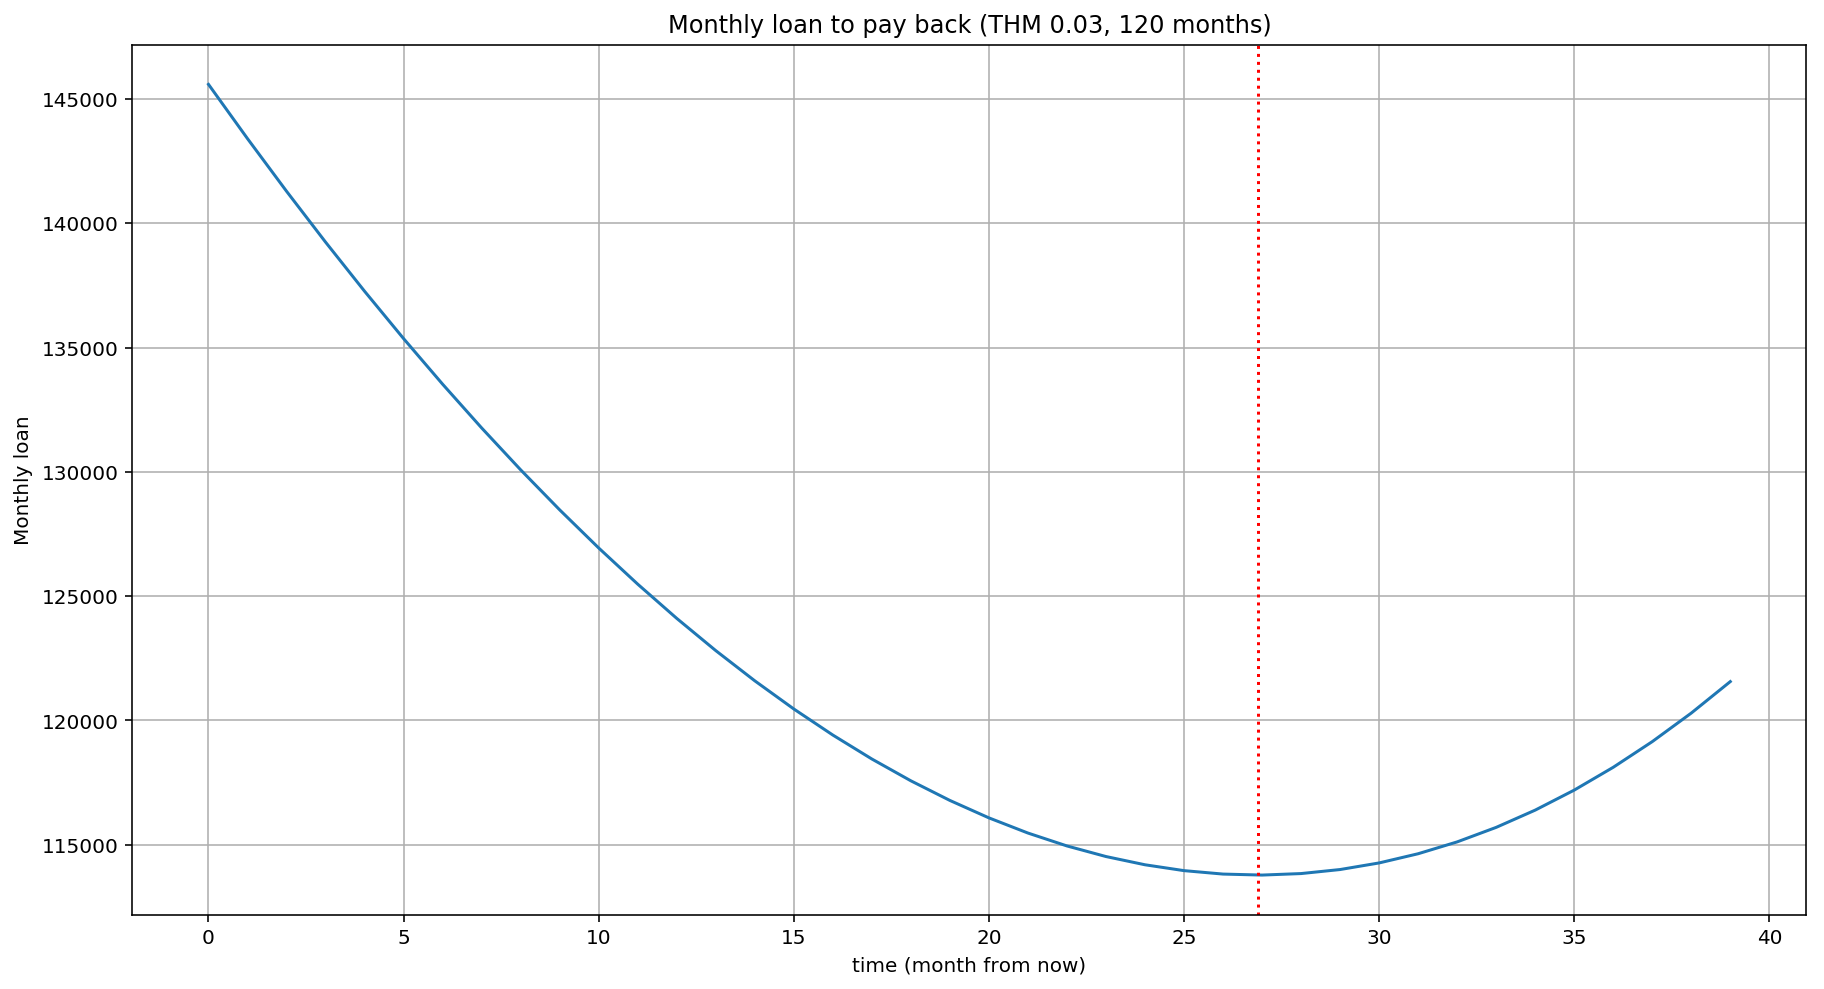

In [40]:
t_range = range(0, 40)
h_range = [ht(t) for t in t_range]
h_monthly_range = [ht(t) / h_max_t for t in t_range]
p_range = [pt(t) for t in t_range]
s_range = [st(t) for t in t_range]

fig, ax = plt.subplots()
ax.plot(t_range, h_monthly_range)

ax.set(xlabel='time (month from now)', ylabel='Monthly loan',
      title='Monthly loan to pay back (THM %s, %s months)' % (thm, h_max_t))
ax.axvline(x=result.x, color="red", linestyle="dotted", label="Optimal time")
ax.grid()

plt.show()

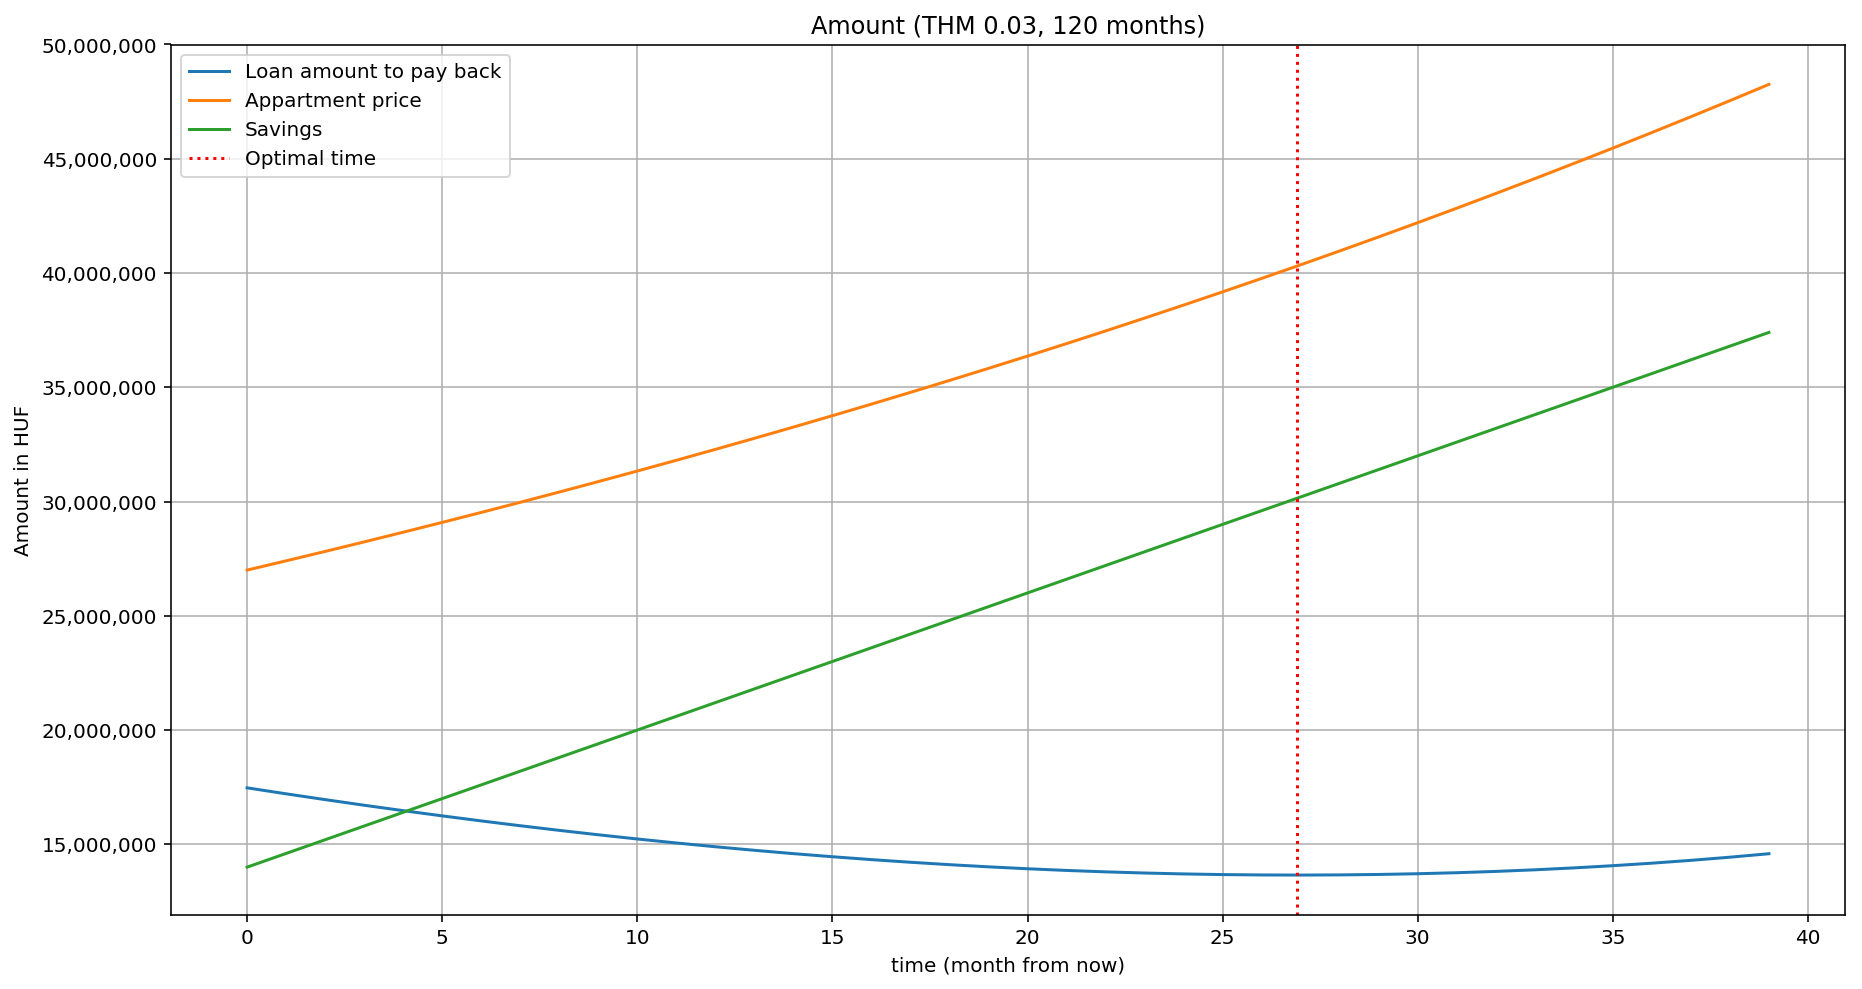

In [41]:
fig, ax = plt.subplots()

# Individual lines
ax.plot(t_range, h_range, label="Loan amount to pay back")
ax.plot(t_range, p_range, label="Appartment price")
ax.plot(t_range, s_range, label="Savings")

# Set axis info and chart title
ax.set(xlabel='time (month from now)', ylabel='Amount in HUF',
      title='Amount (THM %s, %s months)' % (thm, h_max_t))

# Format y axis values
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# Display optimal time as a vertical line
ax.axvline(x=result.x, color="red", linestyle="dotted", label="Optimal time")

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

# Display
ax.grid()
plt.show()